## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  99.454751   852.346935  0.073268  4.819922  0.441471
1  43.015458   843.766477  0.557153  3.144345  1.227570
2  92.707858   313.759587  0.887725  5.732253  1.228074
3  89.642665  1251.364710  0.744522  1.612374  1.275457
4  93.118279   345.043123  0.859828  8.280939  1.227915


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9984267	total: 67.5ms	remaining: 1m 7s
1:	learn: 0.9902737	total: 68ms	remaining: 34s
2:	learn: 0.9790979	total: 68.8ms	remaining: 22.9s
3:	learn: 0.9691749	total: 69.4ms	remaining: 17.3s
4:	learn: 0.9588926	total: 70.1ms	remaining: 14s
5:	learn: 0.9494626	total: 70.6ms	remaining: 11.7s
6:	learn: 0.9397990	total: 71ms	remaining: 10.1s
7:	learn: 0.9317932	total: 71.5ms	remaining: 8.87s
8:	learn: 0.9232981	total: 72.1ms	remaining: 7.94s
9:	learn: 0.9137457	total: 72.6ms	remaining: 7.18s
10:	learn: 0.9042106	total: 73ms	remaining: 6.57s
11:	learn: 0.8928630	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8821087	total: 73.9ms	remaining: 5.61s
13:	learn: 0.8747489	total: 74.4ms	remaining: 5.24s
14:	learn: 0.8675953	total: 75ms	remaining: 4.92s
15:	learn: 0.8586056	total: 75.5ms	remaining: 4.64s
16:	learn: 0.8501298	total: 76ms	remaining: 4.39s
17:	learn: 0.8422723	total: 76.5ms	remaining: 4.17s
18:	learn: 0.8344605	total: 77ms	remaining: 3.97s
19:	lear

94:	learn: 0.4429565	total: 109ms	remaining: 1.04s
95:	learn: 0.4405466	total: 109ms	remaining: 1.03s
96:	learn: 0.4379473	total: 110ms	remaining: 1.02s
97:	learn: 0.4347022	total: 110ms	remaining: 1.01s
98:	learn: 0.4315829	total: 111ms	remaining: 1.01s
99:	learn: 0.4286173	total: 111ms	remaining: 1000ms
100:	learn: 0.4257163	total: 111ms	remaining: 992ms
101:	learn: 0.4230869	total: 112ms	remaining: 985ms
102:	learn: 0.4204924	total: 112ms	remaining: 978ms
103:	learn: 0.4175390	total: 113ms	remaining: 971ms
104:	learn: 0.4151886	total: 113ms	remaining: 963ms
105:	learn: 0.4120081	total: 113ms	remaining: 957ms
106:	learn: 0.4085324	total: 114ms	remaining: 950ms
107:	learn: 0.4069162	total: 114ms	remaining: 944ms
108:	learn: 0.4038437	total: 115ms	remaining: 938ms
109:	learn: 0.4018115	total: 115ms	remaining: 932ms
110:	learn: 0.3987159	total: 116ms	remaining: 927ms
111:	learn: 0.3972144	total: 116ms	remaining: 922ms
112:	learn: 0.3948400	total: 116ms	remaining: 914ms
113:	learn: 0.392

270:	learn: 0.2028235	total: 186ms	remaining: 500ms
271:	learn: 0.2017326	total: 187ms	remaining: 500ms
272:	learn: 0.2013306	total: 187ms	remaining: 498ms
273:	learn: 0.2003951	total: 188ms	remaining: 497ms
274:	learn: 0.2001181	total: 188ms	remaining: 496ms
275:	learn: 0.1997792	total: 188ms	remaining: 494ms
276:	learn: 0.1993342	total: 189ms	remaining: 493ms
277:	learn: 0.1983401	total: 189ms	remaining: 492ms
278:	learn: 0.1977052	total: 190ms	remaining: 490ms
279:	learn: 0.1972475	total: 190ms	remaining: 489ms
280:	learn: 0.1968798	total: 190ms	remaining: 487ms
281:	learn: 0.1965579	total: 191ms	remaining: 486ms
282:	learn: 0.1963015	total: 191ms	remaining: 485ms
283:	learn: 0.1955652	total: 192ms	remaining: 483ms
284:	learn: 0.1946280	total: 192ms	remaining: 482ms
285:	learn: 0.1943780	total: 192ms	remaining: 480ms
286:	learn: 0.1940687	total: 193ms	remaining: 479ms
287:	learn: 0.1930390	total: 193ms	remaining: 478ms
288:	learn: 0.1927118	total: 193ms	remaining: 476ms
289:	learn: 

514:	learn: 0.1085490	total: 291ms	remaining: 274ms
515:	learn: 0.1080036	total: 291ms	remaining: 273ms
516:	learn: 0.1078964	total: 292ms	remaining: 273ms
517:	learn: 0.1077430	total: 292ms	remaining: 272ms
518:	learn: 0.1072455	total: 293ms	remaining: 271ms
519:	learn: 0.1067017	total: 293ms	remaining: 271ms
520:	learn: 0.1064821	total: 294ms	remaining: 270ms
521:	learn: 0.1059520	total: 294ms	remaining: 270ms
522:	learn: 0.1058830	total: 295ms	remaining: 269ms
523:	learn: 0.1058152	total: 295ms	remaining: 268ms
524:	learn: 0.1056003	total: 296ms	remaining: 268ms
525:	learn: 0.1052587	total: 296ms	remaining: 267ms
526:	learn: 0.1048532	total: 297ms	remaining: 266ms
527:	learn: 0.1044533	total: 297ms	remaining: 266ms
528:	learn: 0.1039820	total: 298ms	remaining: 265ms
529:	learn: 0.1034810	total: 298ms	remaining: 264ms
530:	learn: 0.1030942	total: 299ms	remaining: 264ms
531:	learn: 0.1026404	total: 299ms	remaining: 263ms
532:	learn: 0.1021446	total: 300ms	remaining: 263ms
533:	learn: 

685:	learn: 0.0676313	total: 368ms	remaining: 169ms
686:	learn: 0.0675535	total: 369ms	remaining: 168ms
687:	learn: 0.0673827	total: 369ms	remaining: 167ms
688:	learn: 0.0673578	total: 370ms	remaining: 167ms
689:	learn: 0.0673332	total: 370ms	remaining: 166ms
690:	learn: 0.0672570	total: 371ms	remaining: 166ms
691:	learn: 0.0672326	total: 371ms	remaining: 165ms
692:	learn: 0.0671579	total: 371ms	remaining: 164ms
693:	learn: 0.0671338	total: 372ms	remaining: 164ms
694:	learn: 0.0669674	total: 372ms	remaining: 163ms
695:	learn: 0.0669436	total: 373ms	remaining: 163ms
696:	learn: 0.0669201	total: 373ms	remaining: 162ms
697:	learn: 0.0668497	total: 373ms	remaining: 162ms
698:	learn: 0.0667775	total: 374ms	remaining: 161ms
699:	learn: 0.0667542	total: 374ms	remaining: 160ms
700:	learn: 0.0665921	total: 374ms	remaining: 160ms
701:	learn: 0.0665691	total: 376ms	remaining: 160ms
702:	learn: 0.0665464	total: 376ms	remaining: 159ms
703:	learn: 0.0664783	total: 377ms	remaining: 158ms
704:	learn: 

930:	learn: 0.0418245	total: 473ms	remaining: 35.1ms
931:	learn: 0.0417172	total: 473ms	remaining: 34.5ms
932:	learn: 0.0415400	total: 474ms	remaining: 34ms
933:	learn: 0.0415010	total: 474ms	remaining: 33.5ms
934:	learn: 0.0413794	total: 475ms	remaining: 33ms
935:	learn: 0.0413304	total: 475ms	remaining: 32.5ms
936:	learn: 0.0412117	total: 476ms	remaining: 32ms
937:	learn: 0.0410823	total: 476ms	remaining: 31.5ms
938:	learn: 0.0409224	total: 476ms	remaining: 30.9ms
939:	learn: 0.0408723	total: 477ms	remaining: 30.4ms
940:	learn: 0.0408349	total: 477ms	remaining: 29.9ms
941:	learn: 0.0407874	total: 478ms	remaining: 29.4ms
942:	learn: 0.0407510	total: 478ms	remaining: 28.9ms
943:	learn: 0.0406664	total: 479ms	remaining: 28.4ms
944:	learn: 0.0405100	total: 480ms	remaining: 27.9ms
945:	learn: 0.0404617	total: 480ms	remaining: 27.4ms
946:	learn: 0.0404262	total: 481ms	remaining: 26.9ms
947:	learn: 0.0403034	total: 481ms	remaining: 26.4ms
948:	learn: 0.0402688	total: 481ms	remaining: 25.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

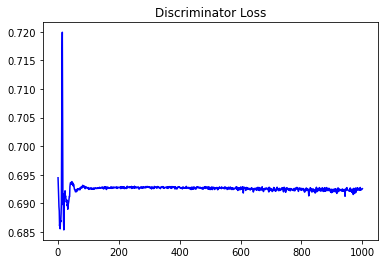

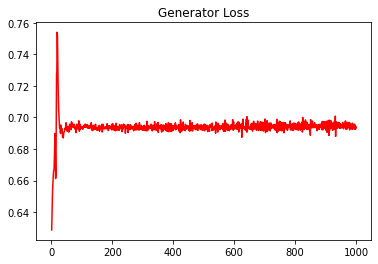

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3658142202283473


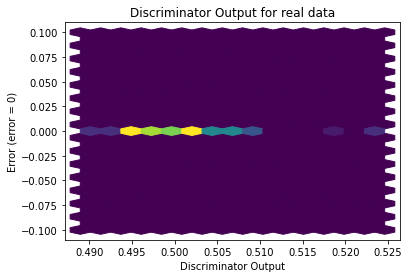

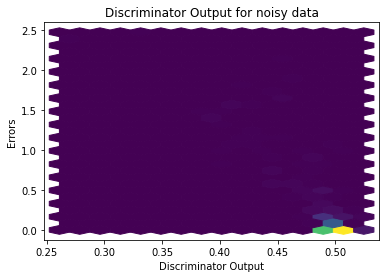

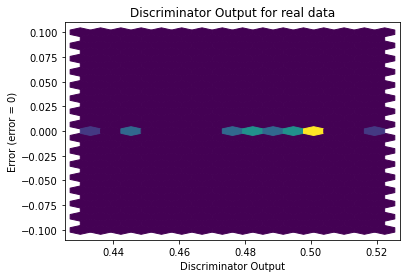

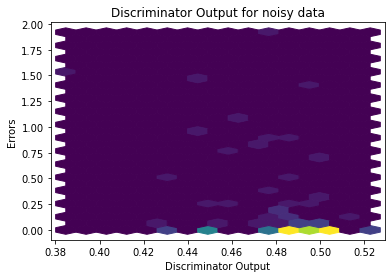

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


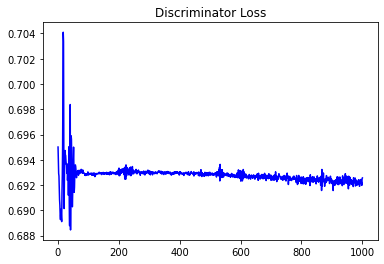

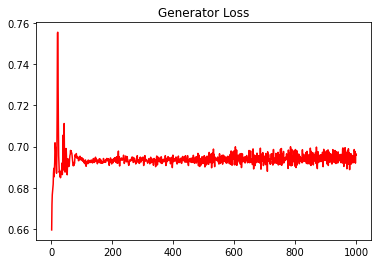

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.40606818163575564


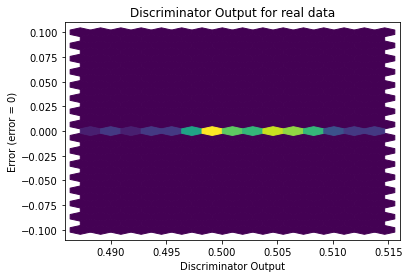

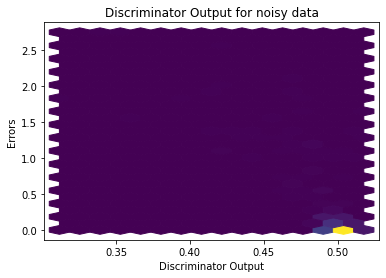

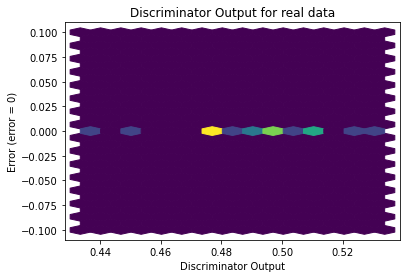

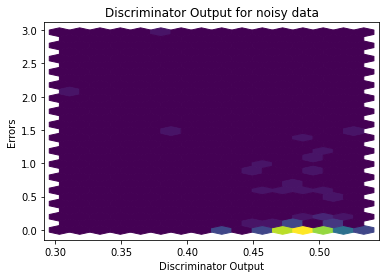

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4224]], requires_grad=True)
